In [39]:
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics

In [40]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder

import seaborn as sns

In [41]:
data= pd.read_csv('~/downloads/winequality-red.csv', sep=';')  #if I dont give seperator, all data will be aligned to right

In [42]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [43]:
data.info()
#we'vr non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [44]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Factorising- 

Quality varies from 2 to 8. Ratings. But Im categorising that into good or bad
Bucketting/ binning- continuous data into discrete chunks to be used as ordinal categorical variables.
bins=(2,5,8) bin lables can not be 2. that is number of edges. Here, edges are 2 and 8.

cut()- segment and sort the data into bins

#lablels= Specifies the labels for the returned bins. 
#cut()- cut data into number of descrete values, those values, I've passed in bin. I can not miss labels attribute

In [45]:

bins=(2,5,8) #bin lables can not be 2. that is number of edges. Here, edges are 2 and 8.
grp=['bad','good']

data['quality']=pd.cut(data['quality'],bins= bins , labels= grp) 

data['quality'].unique()  #Ive run the prev lines, when Im running the current line, I get an error. 
                            #This can be fixed by restarting kernel


[bad, good]
Categories (2, object): [bad < good]

In [46]:
label_quality=LabelEncoder()

In [47]:
data['quality']=label_quality.fit_transform(data['quality'])

In [48]:
data['quality'] #either 1 for good abd 0 for bad

0       0
1       0
2       0
3       1
4       0
5       0
6       0
7       1
8       1
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      1
20      1
21      0
22      0
23      0
24      1
25      0
26      0
27      0
28      0
29      1
       ..
1569    1
1570    1
1571    1
1572    0
1573    1
1574    1
1575    1
1576    1
1577    1
1578    1
1579    0
1580    1
1581    0
1582    0
1583    0
1584    1
1585    1
1586    1
1587    1
1588    1
1589    0
1590    1
1591    1
1592    1
1593    1
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [49]:
data['quality'].head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

In [50]:
data['quality'].value_counts() #there re 855 good wines and 744 bad ones

1    855
0    744
Name: quality, dtype: int64

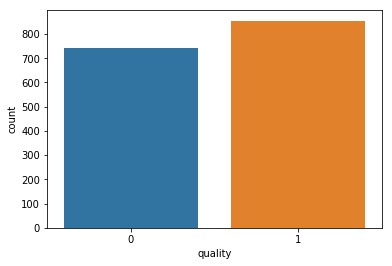

In [51]:
sns.countplot(data['quality'])

In [52]:
#sepearating dataset

X= data.drop('quality', axis=1)
y= data['quality']

In [53]:
#splitting

X_test, X_train, y_test, y_train=train_test_split(X,y, test_size=0.30, random_state= 4)

In [54]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [55]:
y_pred = dtree.predict(X_test)

count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 367
Accuracy: 0.67


In [58]:
import graphviz
feature_names = X.columns

dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,feature_names=feature_names,class_names=class_names)
graph = graphviz.Source(dot_data)  
graph

NameError: name 'class_names' is not defined